In [1]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

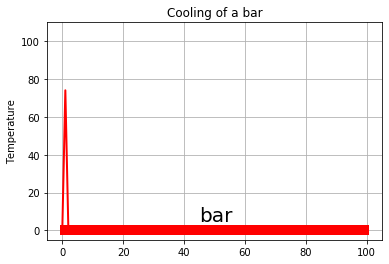

In [3]:
Nx = 101
Dx = 0.01414
Dt = 0.6
KAPPA = 210. #thermal conductivity
SPH = 900. #specific heat
RHO = 2700. #density
cons = KAPPA/(SPH*RHO)*Dt/(Dx*Dx) 
T = np.zeros((Nx,2), float)
def init():
    for ix in range(1, Nx-1): #initial temperature
        T[ix, 0] = 100.0
    T[0,0] = 0.0
    T[0,1] = 0.
    T[Nx - 1, 0] = 0.
    T[Nx - 1, 1] = 0.0
init()
k = range(0,Nx)
fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on = False, xlim=(-5, 105), ylim=(-5,110.0))
ax.grid() #plot grid
plt.ylabel("Temperature")
plt.title("Cooling of a bar")
line, = ax.plot(k, T[k,0], "r", lw =2)
plt.plot([1,99], [0,0], "r", lw=10)
plt.text(45, 5,'bar', fontsize = 20)

def animate(dum):
    for ix in range(1, Nx - 1):
        T[ix, 1] = T[ix, 0]+ cons*(T[ix + 1, 0]+ T[ix -1, 0]-2.0*T[ix,0])
        line.set_data(k,T[k,1])
        for ix in range(1, Nx - 1):
            T[ix, 0] = T[ix, 1]
        return line
ani = animation.FuncAnimation(fig, animate, 1)
plt.show()